# Problem Statement

## Build a predictive model using linear regression to predict a numerical outcome based on one or more features. Use a dataset with a continuous target variable.

## Importing required libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as warn
warn.filterwarnings('ignore')

## Reading the dataset

In [ ]:
df = pd.read_csv('/content/BostonHousing.csv')

In [ ]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Visualizing the distribution of some features of the dataset

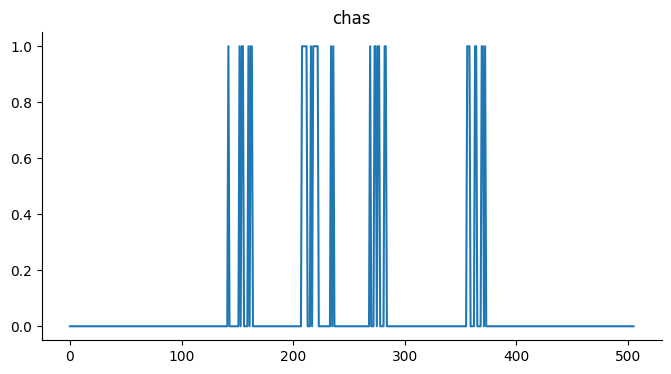

In [ ]:
# @title chas

from matplotlib import pyplot as plt
df['chas'].plot(kind='line', figsize=(8, 4), title='chas')
plt.gca().spines[['top', 'right']].set_visible(False)

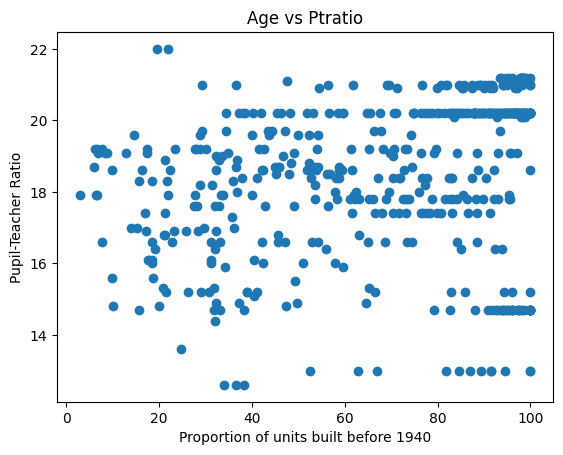

In [ ]:
# @title Age vs Ptratio

import matplotlib.pyplot as plt
plt.scatter(df['age'], df['ptratio'])
plt.xlabel('Proportion of units built before 1940')
plt.ylabel('Pupil-Teacher Ratio')
_ = plt.title('Age vs Ptratio')

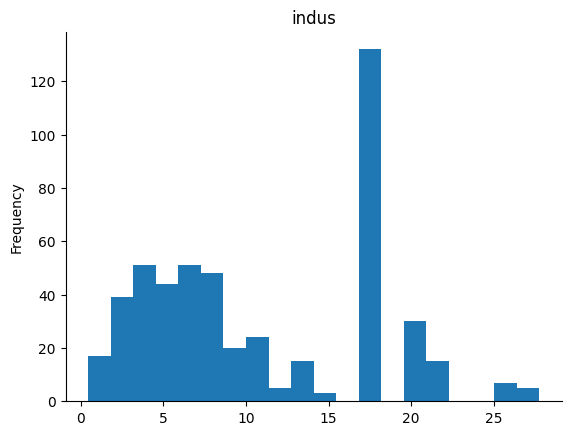

In [ ]:
# @title indus

from matplotlib import pyplot as plt
df['indus'].plot(kind='hist', bins=20, title='indus')
plt.gca().spines[['top', 'right',]].set_visible(False)

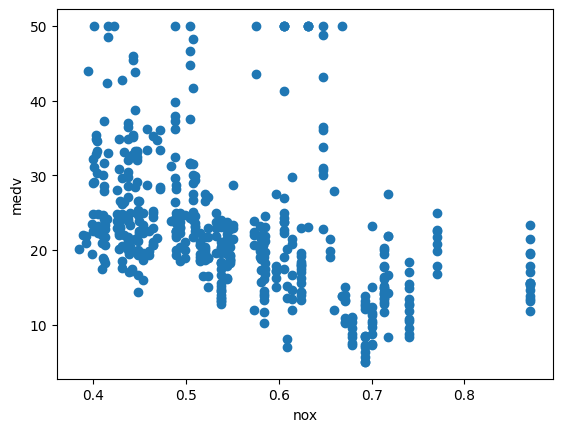

In [ ]:
# @title medv vs nox

import matplotlib.pyplot as plt
plt.scatter(df['nox'], df['medv'])
plt.xlabel('nox')
_ = plt.ylabel('medv')

## Zn

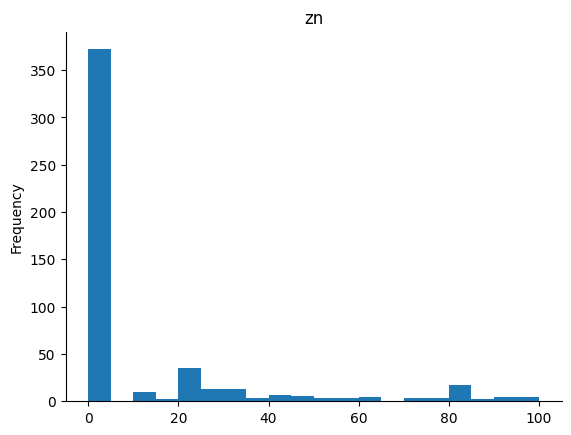

In [ ]:
df['zn'].plot(kind='hist', bins=20, title='zn')
plt.gca().spines[['top', 'right',]].set_visible(False)

## Median value vs Crime rate

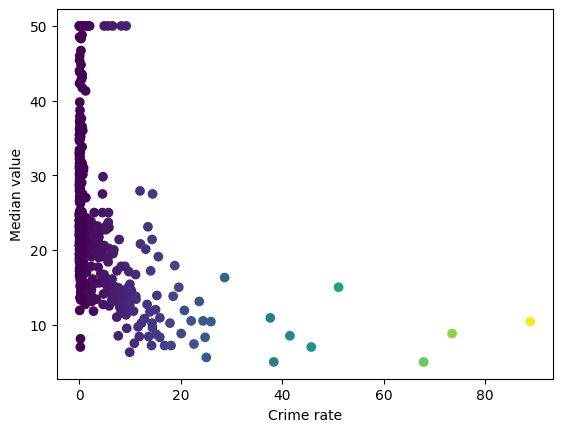

In [ ]:
plt.scatter(df['crim'], df['medv'], c=df['crim'])
plt.xlabel('Crime rate')L
_ = plt.ylabel('Median value')

## Crim

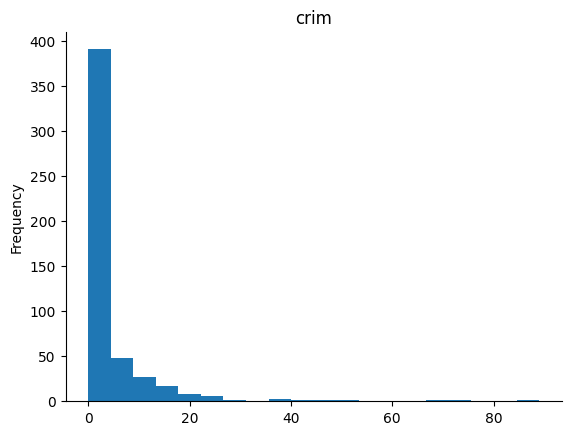

In [ ]:
df['crim'].plot(kind='hist', bins=20, title='crim')
plt.gca().spines[['top', 'right',]].set_visible(False)

## Dataset Info

In [ ]:
'''
The Boston Housing Dataset
The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's
'''

## Exploring the dataset

In [ ]:
df.shape

(506, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


## Visualising the correlation b/w the features

<Axes: >

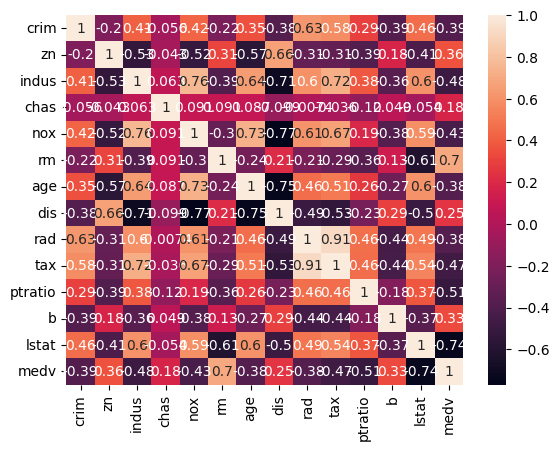

In [ ]:
sns.heatmap(df.corr(),annot=True)

## Checking if there any missing values

In [ ]:
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

## Visualizing the outliers

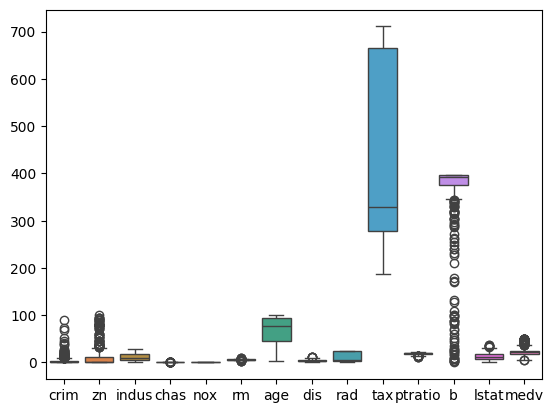

In [ ]:
sns.boxplot(data=df)
plt.show()

## Finding the outliers row numbers

In [ ]:
Q1 = df.quantile(.10)
Q3 = df.quantile(.90)
IQR = Q3 - Q1
outliers_iqr = ((df< (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)
outliers_indices_iqr = outliers_iqr[outliers_iqr].index

In [ ]:
len(outliers_indices_iqr)

74

## Dropping outliers rows

In [ ]:
df1 = df.drop(outliers_indices_iqr,axis=0)

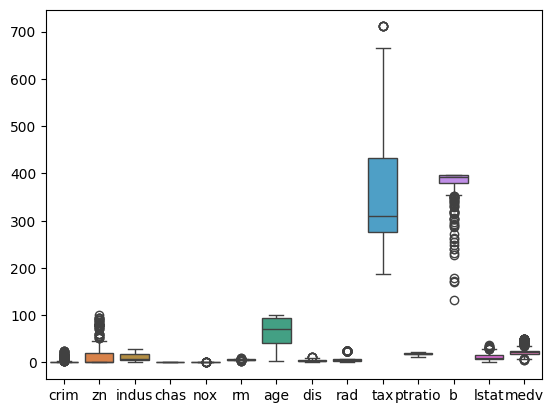

In [ ]:
sns.boxplot(data=df1)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

## Segregating the response features and target feature

In [ ]:
X = df1.drop('medv',axis=1)
y = df1['medv']

## Splitting the dataset into train data and test data

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

## Getting Started with model training using Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

## Showing the metrics of the model performance

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [ ]:
r2_score(y_test,y_pred)

0.5806728853959255

In [ ]:
mean_squared_error(y_test,y_pred)

33.79694684326128

In [ ]:
mean_absolute_error(y_test,y_pred)

3.450008214792724

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))

5.813514156107413

In [ ]:
adjusted_r2_score = 1-((1-r2_score(y_test,y_pred))/(df.shape[0]-df.shape[1]-1))

In [ ]:
adjusted_r2_score

0.9991459732900121

## Showing plot b/w residual and Predicted Values

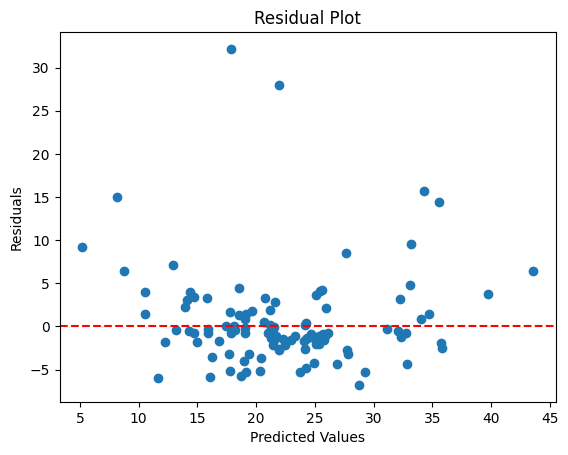

In [ ]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

## Showing the regression line b/w true and predicted values

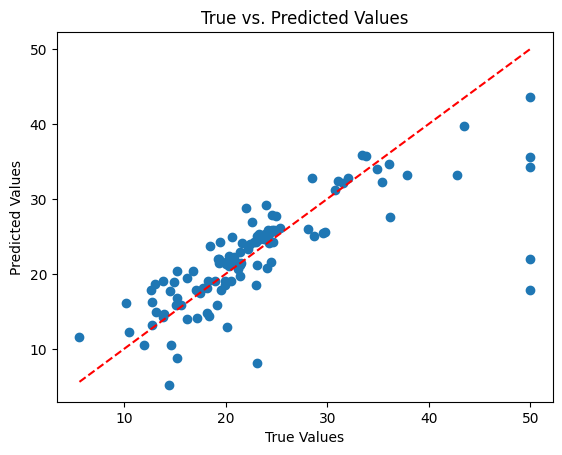

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

## Applying CrossValidation using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
model = LinearRegression()
params = {
    'fit_intercept': [True, False],
    'n_jobs': [1, 2, 3,4],
    'copy_X': [True, False],
    'positive': [True,False]
}
grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy')
grid_search.fit(X, y)
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)

Best Parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': True}
Best Accuracy Score: nan


In [ ]:
model = LinearRegression(**grid_search.best_params_)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
r2_score(y_test,y_pred)

0.38231623397531034

## Plotting metrics of model performance

In [ ]:
mean_absolute_error(y_test,y_pred)

4.055733420714131

In [ ]:
mean_squared_error(y_test,y_pred)

49.784105723744275

In [ ]:
adjusted_r2_score = 1-((1-r2_score(y_test,y_pred))/(df.shape[0]-df.shape[1]-1))

In [ ]:
adjusted_r2_scoreL

0.9987419882565689

## Plotting the graph b/w residuals and predicted values




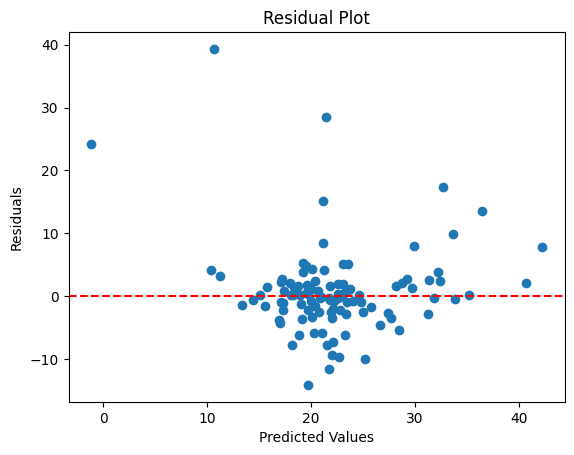

In [ ]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

## Plotting the regression line b/w true values and predicted values

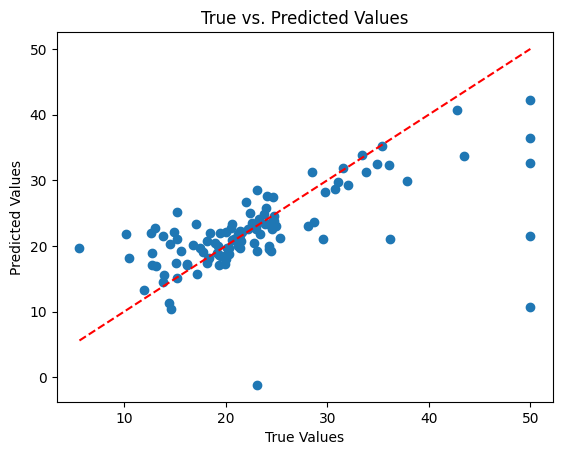

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

## Getting started with model training using Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model = RandomForestRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

## Showing the metrics of model performance

In [ ]:
r2_score(y_test,y_pred)

0.7587506261591707

In [ ]:
mean_squared_error(y_test,y_pred)

19.44422857407407

In [ ]:
mean_absolute_error(y_test,y_pred)

2.3941481481481475

In [ ]:
adjusted_r2_score = 1-((1-r2_score(y_test,y_pred))/(df.shape[0]-df.shape[1]-1))L

In [ ]:
adjusted_r2_score

0.9995086570797539

## Plotting the graph b/w residuals and predicted values




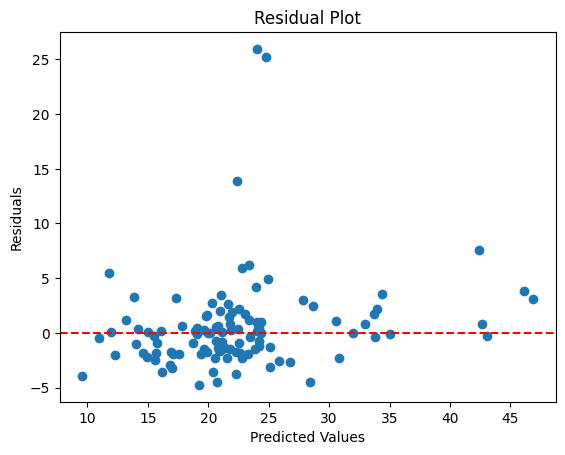

In [ ]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

## Plotting the regression line b/w true values and predicted values

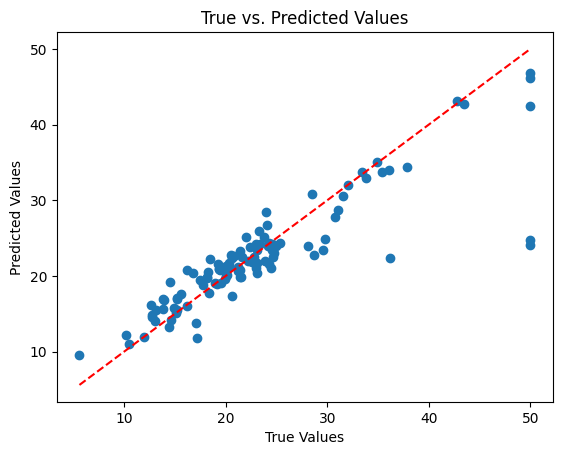

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

## Applying the crossvalidation using Grid Seach CV

In [ ]:
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],L
    'bootstrap': [True, False],
}
model = RandomForestRegressor()
grid_search = GridSearchCV(model, params, cv=2, scoring='accuracy')
grid_search.fit(X, y)
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)

Best Parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Accuracy Score: nan


In [ ]:
model = Random## Showing the metrics of model performanceForestRegressor(**grid_search.best_params_)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

## Showing the metrics of model performance

In [ ]:
r2_score(y_test,y_pred)

0.7531894104517856

In [ ]:
mean_squared_error(y_test,y_pred)

19.892451703703706

In [ ]:
mean_squared_error(y_test,y_pred)

19.892451703703706

In [ ]:
mean_absolute_error(y_test,y_pred)

2.498074074074074

In [ ]:
adjusted_r2_score = 1-((1-r2_score(y_test,y_pred))/(df.shape[0]-df.shape[1]-1))

In [ ]:
adjusted_r2_score

0.9994973307748509

## Plotting the graph b/w residuals and predicted values




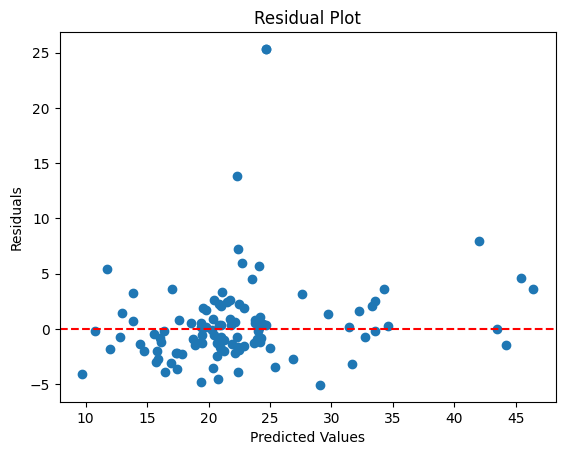

In [ ]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

## Plotting the regression line b/w true values and predicted values

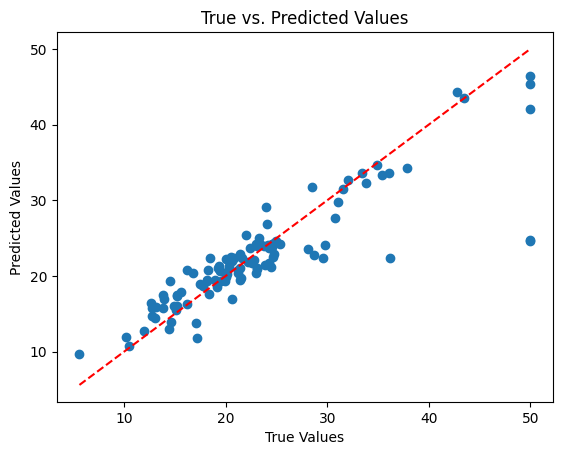

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()